## Cats and dogs image enhancement


In [3]:
! pip install kaggle
import sys

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  from google.colab import files

file = files.upload()
file_name = next(iter(file))
print(file_name)

! mkdir -p ~/.kaggle
! echo $file_name
! cp $file_name ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle (1).json
kaggle.json
kaggle.json
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-02 21:56:08          15131  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9188  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4083  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3381  
promptcloud/ca

In [6]:

# download dataset
! kaggle competitions download -c dogs-vs-cats
! mkdir -p data
! unzip train.zip -d -qq data
! unzip test1.zip -d -qq data

Streaming output truncated to the last 5000 lines.
  inflating: data/test1/55.jpg       
  inflating: data/test1/550.jpg      
  inflating: data/test1/5500.jpg     
  inflating: data/test1/5501.jpg     
  inflating: data/test1/5502.jpg     
  inflating: data/test1/5503.jpg     
  inflating: data/test1/5504.jpg     
  inflating: data/test1/5505.jpg     
  inflating: data/test1/5506.jpg     
  inflating: data/test1/5507.jpg     
  inflating: data/test1/5508.jpg     
  inflating: data/test1/5509.jpg     
  inflating: data/test1/551.jpg      
  inflating: data/test1/5510.jpg     
  inflating: data/test1/5511.jpg     
  inflating: data/test1/5512.jpg     
  inflating: data/test1/5513.jpg     
  inflating: data/test1/5514.jpg     
  inflating: data/test1/5515.jpg     
  inflating: data/test1/5516.jpg     
  inflating: data/test1/5517.jpg     
  inflating: data/test1/5518.jpg     
  inflating: data/test1/5519.jpg     
  inflating: data/test1/552.jpg      
  inflating: data/test1/5520.jpg     

In [12]:
from torch.utils.data import  DataLoader
from torch.utils.data.dataset import Dataset
from torchvision.io import read_image

import glob

from torchvision import datasets, transforms
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [15]:
class CatAndDogDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.imgs_path = root_dir
        self.file_list = glob.glob(str(self.imgs_path) + "*.jpg")
        self.data = []
        for img_path in self.file_list:
            self.data.append(img_path)

        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path = self.data[idx]
        image = read_image(img_path)
        if self.transform:
            image = self.transform(image)

        return image

In [22]:
dataset_test = CatAndDogDataset('./data/test1/')
dataset_train = CatAndDogDataset('./data/train/')
print(len(dataset_train))

25000


In [25]:
def imshow(img):
    img = img
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

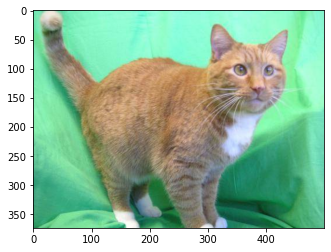

In [26]:
imshow(dataset_train[0])